# Exercise
Represent the temperature forecast in the Strait of Gibraltar.

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import netCDF4

## 1. Data
They are taken from the PdE OPEnDAP server.

In [6]:
dataurl = "http://opendap.puertos.es/thredds/dodsC/circulation_regional_gib/2019/10/SAMGIB-PdE-hm-2019103000-2019110123-B2019103000-FC.nc"

We create a function to extract the coordinates (lon, lat, time) and the temperature from the netCDF.

In [17]:
def get_temperature(datafile):
    with netCDF4.Dataset(datafile) as ds:
        lon = ds.variables["longitude"][:]
        lat = ds.variables["latitude"][:]
        time = ds.variables["time"][:]
        timeunits = ds.variables["time"].units
        T = ds.variables["temperature"][:]
        dates = netCDF4.num2date(time, timeunits)
    return lon, lat, dates, T

In [18]:
lon, lat, dates, T = get_temperature(dataurl)

### Check dimensions

In [19]:
T.shape, lon.shape, lat.shape, dates.shape

((72, 100, 200), (200,), (100,), (72,))

In [20]:
dates

array([datetime.datetime(2019, 10, 30, 0, 30),
       datetime.datetime(2019, 10, 30, 1, 30),
       datetime.datetime(2019, 10, 30, 2, 30),
       datetime.datetime(2019, 10, 30, 3, 30),
       datetime.datetime(2019, 10, 30, 4, 30),
       datetime.datetime(2019, 10, 30, 5, 30),
       datetime.datetime(2019, 10, 30, 6, 30),
       datetime.datetime(2019, 10, 30, 7, 30),
       datetime.datetime(2019, 10, 30, 8, 30),
       datetime.datetime(2019, 10, 30, 9, 30),
       datetime.datetime(2019, 10, 30, 10, 30),
       datetime.datetime(2019, 10, 30, 11, 30),
       datetime.datetime(2019, 10, 30, 12, 30),
       datetime.datetime(2019, 10, 30, 13, 30),
       datetime.datetime(2019, 10, 30, 14, 30),
       datetime.datetime(2019, 10, 30, 15, 30),
       datetime.datetime(2019, 10, 30, 16, 30),
       datetime.datetime(2019, 10, 30, 17, 30),
       datetime.datetime(2019, 10, 30, 18, 30),
       datetime.datetime(2019, 10, 30, 19, 30),
       datetime.datetime(2019, 10, 30, 20, 30),
  

### Simple plot to check

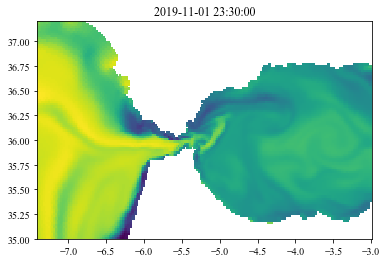

In [24]:
plt.pcolormesh(lon, lat, T[-1,:,:])
plt.title(dates[-1])
plt.show()

## 2. Loop on time 
1. Create a plotting function.
2. Create one figure per time instance.

### Plotting function

In [30]:
def plot_temperature(lon, lat, date, temperature):
    fig = plt.figure()
    plt.pcolormesh(lon, lat, temperature, 
                   vmin=18.5, vmax=22.,
                   cmap=plt.cm.RdYlBu_r)
    plt.colorbar(extend="both")
    plt.title(date)

In [31]:
for i, date in enumerate(dates):
    plot_temperature(lon, lat, date, T[i,:,:])
    plt.savefig("temperature_{}".format(str(i).zfill(3)), 
                dpi=300, bbox_inches="tight")

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


## 3. Get the temperature near Cadiz

In [ ]:
coordinates = (, )